In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, LeakyReLU
from keras.metrics import AUC, Recall
from sklearn.model_selection import train_test_split

from _common import NUM_LABEL_COLS, RANDOM_SEED
from _tenor import NUM_COMPONENTS, TEST_SIZE, VALIDATION_SIZE, \
    d, target
# Note that records are read from pickle, selected, and scaled 
# in `_tenor.py`. So values in d have already been scaled
# with sklearn.preprocessing.StandardScaler and then PCA has
# been performed with sklearn.decomposition.PCA

In [10]:
NUM_COMPONENTS

36

In [11]:
x_train, x_test, y_train, y_test = \
     train_test_split(d, target,
                      test_size=TEST_SIZE,
                      random_state=RANDOM_SEED)

In [12]:
NUM_EPOCHS = 20
BATCH_SIZE = 32

# layer = tf.keras.layers.LeakyReLU(alpha=0.1)
# https://keras.io/api/layers/activations/
# https://keras.io/api/layers/activation_layers/leaky_relu/

model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.125))  # drop out one unit on each train
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.125))  # drop out one unit on each train
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall')])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)
loss, recall = model.evaluate(x_test, y_test)


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 3728 samples, validate on 933 samples
Epoch 1/20
3728/3728 [==============================] - 2s 416us/step - loss: 1.3276 - recall: 0.6231 - val_loss: 0.7019 - val_recall: 0.6343
Epoch 2/20
3728/3728 [==============================] - 1s 144us/step - loss: 0.7132 - recall: 0.6445 - val_loss: 0.6144 - val_recall: 0.7831
Epoch 3/20
3728/3728 [==============================] - 1s 137us/step - loss: 0.6257 - recall: 0.6918 - val_loss: 0.5623 - val_recall: 0.7975
Epoch 4/20
3728/3728 [==============================] - 1s 147us/step - loss: 0.5655 - recall: 0.7142 - val_loss: 0.5085 - val_recall: 0.7913
Epoch 5/20
3728/3728 [==============================] - 1s 140us/step - loss: 0.5177 - recall: 0.7225 - val_loss: 0.4744 - val_recall: 0.7975
Epoch 6/20
3728/3728 [==============================] - 1s 136us/step - loss: 0.5023 - recall: 0.7121 - val_loss: 0.4514 - val_recall: 0.8161
Epoch 

In [13]:
# auc, 
loss, recall = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))

1166/1166 [==============================] - 0s 40us/step
Recall: 85.49


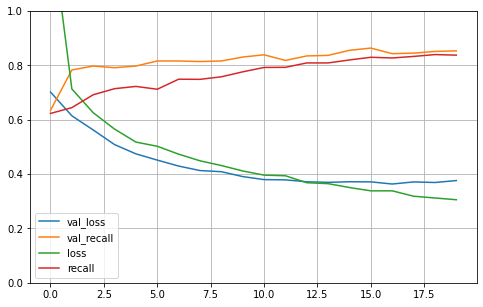

In [14]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [20]:
# layer = tf.keras.layers.LeakyReLU(alpha=0.1)
# See: About "advanced activation" layers at bottom page at
#  https://keras.io/api/layers/activations/
# https://keras.io/api/layers/activation_layers/leaky_relu/

model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(LeakyReLU(alpha=0.3))
# model.add(Dropout(0.125))  # drop out one unit on each train
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.125))  # drop out one unit on each train
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall')])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)
loss, recall = model.evaluate(x_test, y_test)


Train on 3728 samples, validate on 933 samples
Epoch 1/20
3728/3728 [==============================] - 2s 438us/step - loss: 2.0862 - recall: 0.6793 - val_loss: 0.9145 - val_recall: 0.6488
Epoch 2/20
3728/3728 [==============================] - 1s 179us/step - loss: 0.8333 - recall: 0.6137 - val_loss: 0.6648 - val_recall: 0.6529
Epoch 3/20
3728/3728 [==============================] - 1s 166us/step - loss: 0.6452 - recall: 0.6080 - val_loss: 0.6068 - val_recall: 0.6591
Epoch 4/20
3728/3728 [==============================] - 1s 144us/step - loss: 0.5674 - recall: 0.6205 - val_loss: 0.5648 - val_recall: 0.6736
Epoch 5/20
3728/3728 [==============================] - 1s 155us/step - loss: 0.5060 - recall: 0.6325 - val_loss: 0.5466 - val_recall: 0.6963
Epoch 6/20
3728/3728 [==============================] - 1s 154us/step - loss: 0.4796 - recall: 0.6471 - val_loss: 0.5274 - val_recall: 0.7128
Epoch 7/20
3728/3728 [==============================] - 1s 169us/step - loss: 0.4460 - recall: 0.6731

In [21]:
# auc, 
loss, recall = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))

1166/1166 [==============================] - 0s 47us/step
Recall: 85.49


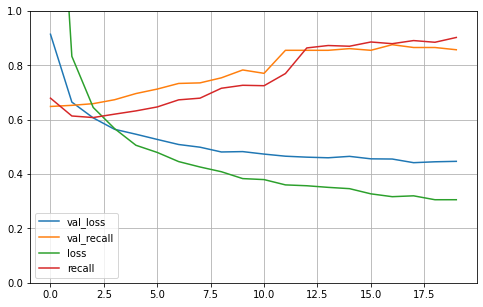

In [22]:
# history is a keras.callbacks.callbacks.History object
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()


In [23]:
# layer = tf.keras.layers.LeakyReLU(alpha=0.1)
# See: About "advanced activation" layers at bottom page at
#  https://keras.io/api/layers/activations/
# See: https://keras.io/api/layers/activation_layers/leaky_relu/

model = Sequential()
model.add(Dense(32, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(LeakyReLU(alpha=0.3))
model.add(Dropout(0.125))  # drop out one unit on each train
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall')])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)
loss, recall = model.evaluate(x_test, y_test)


Train on 3728 samples, validate on 933 samples
Epoch 1/20
3728/3728 [==============================] - 2s 452us/step - loss: 1.1307 - recall: 0.6346 - val_loss: 0.7218 - val_recall: 0.6798
Epoch 2/20
3728/3728 [==============================] - 1s 192us/step - loss: 0.6497 - recall: 0.6314 - val_loss: 0.6058 - val_recall: 0.6694
Epoch 3/20
3728/3728 [==============================] - 1s 146us/step - loss: 0.5731 - recall: 0.6434 - val_loss: 0.5630 - val_recall: 0.7045
Epoch 4/20
3728/3728 [==============================] - 0s 125us/step - loss: 0.5301 - recall: 0.6746 - val_loss: 0.5306 - val_recall: 0.7397
Epoch 5/20
3728/3728 [==============================] - 1s 160us/step - loss: 0.4800 - recall: 0.7054 - val_loss: 0.5003 - val_recall: 0.7438
Epoch 6/20
3728/3728 [==============================] - 1s 159us/step - loss: 0.4534 - recall: 0.7288 - val_loss: 0.4852 - val_recall: 0.7665
Epoch 7/20
3728/3728 [==============================] - 1s 140us/step - loss: 0.4362 - recall: 0.7392

In [24]:
# auc, 
loss, recall = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))

1166/1166 [==============================] - 0s 46us/step
Recall: 77.80


In [33]:
# layer = tf.keras.layers.LeakyReLU(alpha=0.1)
# See: About "advanced activation" layers at bottom page at
#  https://keras.io/api/layers/activations/
# See: https://keras.io/api/layers/activation_layers/leaky_relu/

model = Sequential()
model.add(LeakyReLU(input_shape=(NUM_COMPONENTS,), alpha=0.3))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(0.125))  # drop out one unit on each train
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', 
              metrics=[Recall(name='recall')])
history = model.fit(x_train, y_train, epochs=NUM_EPOCHS, 
                    batch_size=BATCH_SIZE, 
                    validation_split=VALIDATION_SIZE)
loss, recall = model.evaluate(x_test, y_test)


Train on 3728 samples, validate on 933 samples
Epoch 1/20
3728/3728 [==============================] - 2s 548us/step - loss: 0.8799 - recall: 0.5429 - val_loss: 0.6713 - val_recall: 0.6570
Epoch 2/20
3728/3728 [==============================] - 1s 178us/step - loss: 0.6737 - recall: 0.6330 - val_loss: 0.6253 - val_recall: 0.6653
Epoch 3/20
3728/3728 [==============================] - 1s 171us/step - loss: 0.6312 - recall: 0.6934 - val_loss: 0.5911 - val_recall: 0.7335
Epoch 4/20
3728/3728 [==============================] - 1s 179us/step - loss: 0.5936 - recall: 0.7434 - val_loss: 0.5616 - val_recall: 0.8099
Epoch 5/20
3728/3728 [==============================] - 1s 164us/step - loss: 0.5597 - recall: 0.7897 - val_loss: 0.5361 - val_recall: 0.8037
Epoch 6/20
3728/3728 [==============================] - 1s 181us/step - loss: 0.5341 - recall: 0.8142 - val_loss: 0.5173 - val_recall: 0.8182
Epoch 7/20
3728/3728 [==============================] - 1s 173us/step - loss: 0.5167 - recall: 0.8188

In [34]:
# auc, 
loss, recall = model.evaluate(x_test, y_test)
# print('AUC: %.2f' % (auc * 100))
print('Recall: %.2f' % (recall * 100))

1166/1166 [==============================] - 0s 133us/step
Recall: 84.44
